In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [91]:
matches=pd.read_csv('matches.csv')
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [92]:
matches.replace("Delhi Daredevils","Delhi Capitals",inplace=True)

In [93]:
team1=["Mumbai Indians","Delhi Capitals"]
team2=["Delhi Capitals","Mumbai Indians"]
data=matches[matches["team1"].isin(team1)][matches["team2"].isin(team2)]
data.head()

C:\Users\Rutik Ambre\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
23,24,2017,Mumbai,2017-04-22,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,14,0,MJ McClenaghan,Wankhede Stadium,A Nand Kishore,S Ravi,NaN
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN
81,82,2008,Mumbai,2008-05-04,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Mumbai Indians,29,0,SM Pollock,Dr DY Patil Sports Academy,IL Howell,RE Koertzen,NaN
108,109,2008,Delhi,2008-05-24,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,5,KD Karthik,Feroz Shah Kotla,BF Bowden,K Hariharan,NaN
149,150,2009,East London,2009-05-08,Mumbai Indians,Delhi Capitals,Mumbai Indians,bat,normal,0,Delhi Capitals,0,7,A Nehra,Buffalo Park,M Erasmus,SK Tarapore,NaN


In [94]:
data.shape

(24, 18)

In [95]:
delivery=pd.read_csv('deliveries.csv')
delivery.replace("Delhi Daredevils","Delhi Capitals",inplace=True)
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


Data is preprocessed match data and ball is preprocessed delivery data 

In [96]:
ball=delivery[delivery["batting_team"].isin(team1)][delivery["bowling_team"].isin(team2)]
ball.head()


C:\Users\Rutik Ambre\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
5512,24,1,Mumbai Indians,Delhi Capitals,1,1,PA Patel,JC Buttler,K Rabada,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
5513,24,1,Mumbai Indians,Delhi Capitals,1,2,JC Buttler,PA Patel,K Rabada,0,...,0,0,0,0,0,5,5,NaN,NaN,NaN
5514,24,1,Mumbai Indians,Delhi Capitals,1,3,JC Buttler,PA Patel,K Rabada,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
5515,24,1,Mumbai Indians,Delhi Capitals,1,4,PA Patel,JC Buttler,K Rabada,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
5516,24,1,Mumbai Indians,Delhi Capitals,1,5,JC Buttler,PA Patel,K Rabada,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [97]:
print(" The total number of matches played between MI and DC are", len(data))
print(" The total number of venues for matches played between MI and DC are", data['city'].unique())

 The total number of matches played between MI and DC are 24
 The total number of venues for matches played between MI and DC are ['Mumbai' 'Delhi' 'East London' 'Centurion' 'Sharjah' 'Visakhapatnam']


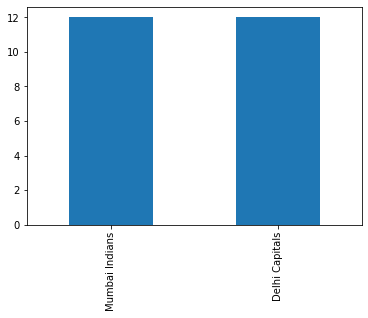

In [98]:
data['winner'].value_counts().plot(kind='bar')   #head to head

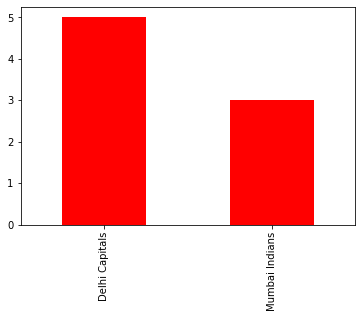

In [99]:
toss=data[data['toss_winner']==data['winner']]
toss['winner'].value_counts().plot(kind='bar',color='red')     #winning toss and matches

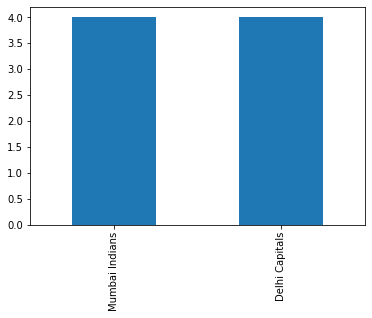

In [100]:
datas= data[data['season']>2015]               #last 5 year record
datas['winner'].value_counts().plot(kind='bar')

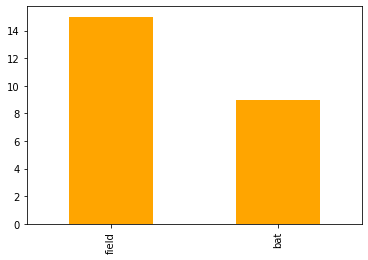

In [101]:
data['toss_decision'].value_counts().plot(kind='bar',color='orange')  #fielding first or batting first choice

As both the teams had same head to head record till 2019 i.e 12 on each side , so it is better to dive deeper , 
the team fielding first have won more matches and also delhi winning toss and winning matches as well has happenned more 5 to 3
Even the last 5 years both the teams have won equal number of matches. But the current form puts MI forward to winning as 
they have won both matches this season against delhi


In [102]:
ball['player_out']=ball['player_dismissed'].apply(lambda x: 1 if not pd.isnull(x) else 0)
ball.drop(columns=['player_dismissed','fielder'],inplace=True)
ball

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,dismissal_kind,player_out
5512,24,1,Mumbai Indians,Delhi Capitals,1,1,PA Patel,JC Buttler,K Rabada,0,0,0,1,0,0,0,1,1,NaN,0
5513,24,1,Mumbai Indians,Delhi Capitals,1,2,JC Buttler,PA Patel,K Rabada,0,5,0,0,0,0,0,5,5,NaN,0
5514,24,1,Mumbai Indians,Delhi Capitals,1,3,JC Buttler,PA Patel,K Rabada,0,0,0,0,0,0,1,0,1,NaN,0
5515,24,1,Mumbai Indians,Delhi Capitals,1,4,PA Patel,JC Buttler,K Rabada,0,0,0,0,0,0,1,0,1,NaN,0
5516,24,1,Mumbai Indians,Delhi Capitals,1,5,JC Buttler,PA Patel,K Rabada,0,0,0,0,0,0,0,0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173000,11325,2,Delhi Capitals,Mumbai Indians,20,2,K Rabada,A Mishra,HH Pandya,0,0,0,0,0,0,6,0,6,NaN,0
173001,11325,2,Delhi Capitals,Mumbai Indians,20,3,K Rabada,A Mishra,HH Pandya,0,0,0,0,0,0,0,0,0,NaN,0
173002,11325,2,Delhi Capitals,Mumbai Indians,20,4,K Rabada,A Mishra,HH Pandya,0,0,0,0,0,0,0,0,0,caught,1
173003,11325,2,Delhi Capitals,Mumbai Indians,20,5,A Mishra,I Sharma,HH Pandya,0,0,0,0,0,0,2,0,2,NaN,0


In [103]:
powerplay=ball[ball['over']<7]
powerplay_match = powerplay.groupby(by=["match_id"], as_index=False).agg({'inning': 'first', 'batting_team': 'first', 
                                                                          'bowling_team': 'first', 'total_runs': 'sum',
                                                                         'player_out':'sum'})
match_season= data[['id', 'season']]
powerplay_match=powerplay_match.merge(match_season,left_on='match_id', right_on='id')

Text(0, 0.5, 'Frequency')

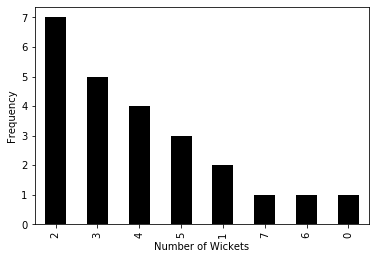

In [104]:
powerplay_match['player_out'].value_counts().plot(kind='bar',color='black')
plt.xlabel("Number of Wickets")
plt.ylabel("Frequency")

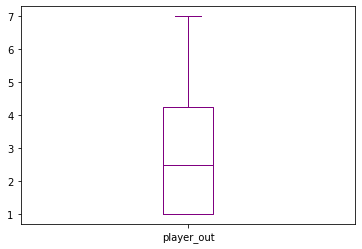

In [105]:
powerplay_match['player_out'].value_counts().plot(kind='box',color='purple')

by plotting the data and grouping it by season we see there are outliers like 0,6,7 wickets in the powerplay
but the most of the wickets in the powerplay are skewed towards 2,3,4 wickets in powerplay
The mean is also close to 3 
so wickets falling will be 2-3


In [114]:
batsman_30 = ball.groupby(by=["match_id","batsman"], as_index=False).agg({'inning': 'first', 'batsman_runs': 'sum'})
batsman_30 = batsman_30[batsman_30["batsman_runs"]>30]
batsman_30 = batsman_30.merge(match_season,left_on='match_id', right_on='id')
batsman_30.head()

,match_id,batsman,inning,batsman_runs,id,season
0,24,CH Morris,2,52,24,2017
1,24,K Rabada,2,44,24,2017
2,44,KA Pollard,1,63,44,2017
3,44,LMP Simmons,1,66,44,2017
4,82,SM Pollock,1,33,82,2008


Text(0, 0.5, 'Frequency')

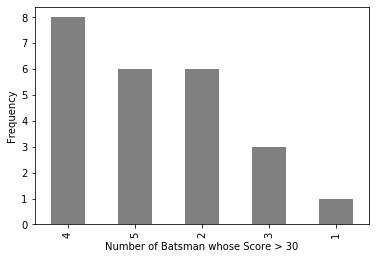

In [121]:
batsman_count = batsman_30.groupby(by=['match_id'],as_index=False).agg({'batsman':'count','season':'first'})
batsman_count['batsman'].value_counts().plot(kind='bar',color='gray')
plt.xlabel('Number of Batsman whose Score > 30')
plt.ylabel('Frequency')

As the given bar graph is shown the number of times where 1 batsman has scored 30 plus is outlier
And the number of batsman who have score more than 30 is 4 per match has the most frequency
Also this year 1 batsman scored above 30 in 1 match , and 4 batsman scored above 30 in the other
So 4 batsman will score above 30

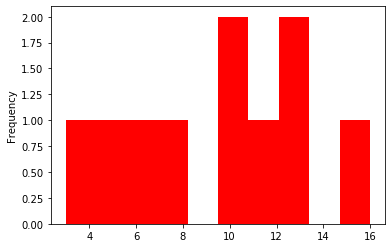

In [141]:
death = ball.loc[(( ball['over'] > 15 ) & (ball['bowler']=="JJ Bumrah"))]                            
death_stats_bumrah = death.groupby(by=["match_id","over"],as_index=False).agg({'total_runs':'sum','player_out':'sum'})
death_stats_bumrah = death.groupby(by=["match_id"],as_index=False).agg({'total_runs':'sum','over':'count','player_out':'sum'})
death_stats_bumrah.replace(12,2,inplace=True)
death_stats_bumrah.replace(8,1,inplace=True)
death_stats_bumrah.replace(20,3,inplace=True)
death_stats_bumrah['Economy']=death_stats_bumrah['total_runs']/death_stats_bumrah['over']
death_stats_bumrah['Economy'].plot(kind='hist',color='red')

The histogram shows bumrah death stats vs delhi has more frequency when the economy has been over 9 this has been for most of the matches he has played.

In [159]:
Bowler_over= ball[ball["extra_runs"]==0][["ball","bowler"]] # here extra balls I am not considering include in over
Bowler_over= Bowler_over.groupby("bowler")["ball"].count().reset_index().sort_values(by="ball",ascending=False).reset_index(drop=True)
Bowler_over["No_of_Overs"]=(Bowler_over["ball"]/6)
Bowler_over.iloc[:20,:]

Bowler_Runs= ball.groupby("bowler")["total_runs"].sum().reset_index().sort_values(by="total_runs",ascending=False).reset_index(drop=True)

Bowler_economy= pd.merge(Bowler_Runs,Bowler_over,on="bowler")
Bowler_economy['economy']=Bowler_economy['total_runs']/Bowler_economy['No_of_Overs']
Bowler_economy

,bowler,total_runs,ball,No_of_Overs,economy
0,Harbhajan Singh,428,377,62.833333,6.811671
1,A Mishra,381,294,49.000000,7.775510
2,JJ Bumrah,335,235,39.166667,8.553191
3,SL Malinga,332,276,46.000000,7.217391
4,S Nadeem,265,214,35.666667,7.429907
...,...,...,...,...,...
93,Shoaib Malik,6,6,1.000000,6.000000
94,Yuvraj Singh,5,6,1.000000,5.000000
95,LR Shukla,5,6,1.000000,5.000000
96,N Rana,3,6,1.000000,3.000000


In [171]:
 final = Bowler_economy[Bowler_economy['No_of_Overs']>8.0]
 final.head()

,bowler,total_runs,ball,No_of_Overs,economy
0,Harbhajan Singh,428,377,62.833333,6.811671
1,A Mishra,381,294,49.000000,7.775510
2,JJ Bumrah,335,235,39.166667,8.553191
3,SL Malinga,332,276,46.000000,7.217391
4,S Nadeem,265,214,35.666667,7.429907


In matches for MI vs DC there are only 3-4 bowlers whose economy is more than 9 that is hardik pandya trent boult 
But hardik pandya isn't bowling this season
So 3-4 is ideal conclusion